# Práctico 2 - Procesamiento Digital de Imágenes

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

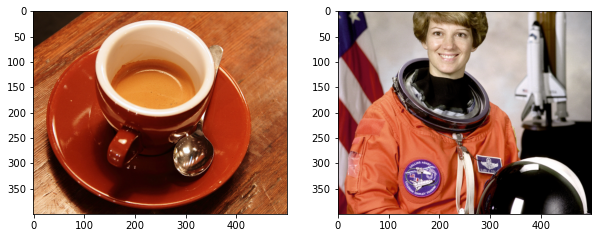

In [4]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

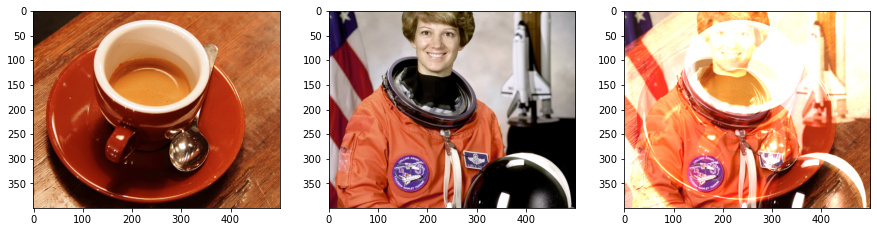

In [5]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

In [67]:
def if_lighter(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y > img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y >= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

def if_darker(img_1, img_2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = img_1_y < img_2_y
    img_3[mask] = img_1[mask]
    
    mask = img_2_y <= img_1_y
    img_3[mask] = img_2[mask]
    
    return img_3

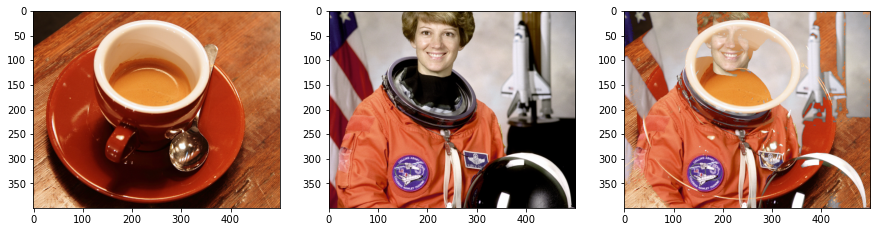

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(if_lighter(img_1, img_2))

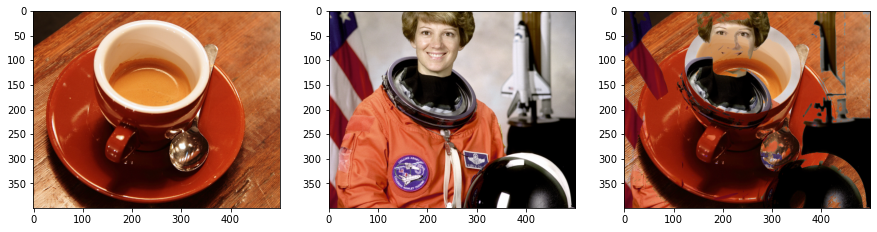

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(if_darker(img_1, img_2))

# ¿Cómo implementar funciones similares sin repetir código?

Lo único que cambia entre if_lighter e if_darker es el operador lógico. Como Python permite pasar a una función un argumento que sea otra función, podemos hacer una función base que tenga la estructura de if_lighter e if_darker pero que le pasemos los operadores lógicos que queremos.

Abajo se muestra lo mencionado, donde select_with_mask es la función base y las funciones if_lighter e if_darker llaman a esta función especificando los operadores. Esto mismo se puede hacer con la suma y resta de imágenes.

NOTA: la sentencia "lambda" en Python sirve para definir funciones simples en una sola línea. Por ejemplo:
`suma = lambda x, y: x + y`
crea una función llamada suma que toma como argumentos dos valores x e y, y devuelve la suma. Luego se puede llamar a la función por ejemplo con `z = suma(-41,17)`. Entonces, lo que se le pasa a los argumentos op1 y op2 son funciones que implementan a los operadores lógicos.

In [70]:
def select_with_mask(img_1, img_2, op1, op2):
    img_1_y = rgb2yiq(img_1)[:,:,0]
    img_2_y = rgb2yiq(img_2)[:,:,0]
    img_3 = np.zeros(img_1.shape)
    
    mask = op1(img_1_y, img_2_y)
    img_3[mask] = img_1[mask]
    
    mask = op2(img_1_y, img_2_y)
    img_3[mask] = img_2[mask]
    
    return img_3

def if_darker(img_1, img_2):
    return select_with_mask(img_1, img_2, lambda x,y: x<y, lambda x,y: x>=y)

def if_lighter(img_1, img_2):
    return select_with_mask(img_1, img_2, lambda x,y: x>y, lambda x,y: x<=y)